In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics

In [250]:
data: pd.DataFrame = pd.read_csv("../elden_ring_steam_reviews.csv")
data

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134238864,english,being killed over and over again is fun,2023-03-07 14:19:11,True,0,0,False,False,False,47,2,355,355,346,2023-03-07 14:29:21
1,134238208,english,I write this review as I have 100% completed E...,2023-03-07 14:03:24,True,0,0,True,False,False,110,2,24238,5823,24238,2023-03-07 02:08:22
2,134238033,english,Fun,2023-03-07 13:59:13,True,0,0,True,False,False,11,1,912,912,881,2023-03-07 14:30:07
3,134237508,english,pretty cool.,2023-03-07 13:46:37,True,0,0,True,False,False,94,8,8497,2914,8497,2023-03-07 13:44:52
4,134236511,english,AMAZINGGGGGGGGGGGGG,2023-03-07 13:20:04,True,0,0,True,False,False,4,1,985,163,923,2023-03-07 14:26:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,131803069,english,Best platformer of the year.,2023-01-29 14:50:25,True,0,0,True,False,False,112,8,12095,1751,7565,2023-03-06 13:54:32
9790,131802918,english,"truly fun...very recommended, worth the money ...",2023-01-29 14:47:55,True,0,0,True,False,False,17,4,9467,39,8394,2023-02-26 17:51:52
9791,131802717,english,mimic is the friend we made along the way,2023-01-29 14:44:41,True,0,0,True,False,False,34,3,8098,6,5655,2023-02-23 10:17:41
9792,131802309,english,"The lands of Elden Ring are vast and wild, fil...",2023-01-29 14:38:38,True,1,0,True,False,False,70,8,9472,201,9191,2023-03-05 13:39:17


In [251]:
# data["trust_apple"].replace({"Yes" : 1, "No" : 0}, inplace=True)
# data["m1_purchase"].replace({"Yes" : 1, "No" : 0}, inplace=True)
# data["familiarity_m1"].replace({"Yes" : 1, "No" : 0}, inplace=True)
# data["gender"].replace({"Male" : 1, "Female" : 0}, inplace=True)
# data["status"].replace({"Student" : 0, "Retired" : 0, "Unemployed" : 0, "Student ant employed" : 1, "Employed" : 1, "Self-Employed" : 1}, inplace=True)
# data["user_pcmac"].replace({"Apple" : 1, "PC" : 0, "Hp" : 0, "Other" : 0}, inplace=True)
# data.drop_duplicates(inplace=True)

from sklearn.calibration import LabelEncoder
import sklearn.preprocessing as preprocessing


encoder = preprocessing.LabelEncoder()
data["review"].fillna("empty", inplace=True)
for column in data.columns:
    if data[column].dtype == 'object':
    # Примените кодирование только к колонкам с типом 'object' (строки)
        data[column] = encoder.fit_transform(data[column])

del data["id"]
del data["steam_purchase"]
del data["language"]
del data["written_during_early_access"]
data

,review,created,voted_up,votes_up,comment_count,recieved_for_free,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,5701,9776,True,0,0,False,47,2,355,355,346,9708
1,2798,9775,True,0,0,False,110,2,24238,5823,24238,8075
2,1655,9774,True,0,0,False,11,1,912,912,881,9716
3,7485,9773,True,0,0,False,94,8,8497,2914,8497,9454
4,427,9772,True,0,0,False,4,1,985,163,923,9691
...,...,...,...,...,...,...,...,...,...,...,...,...
9789,916,4,True,0,0,False,112,8,12095,1751,7565,7197
9790,7964,3,True,0,0,False,17,4,9467,39,8394,3725
9791,7213,2,True,0,0,False,34,3,8098,6,5655,3087
9792,4594,1,True,1,0,False,70,8,9472,201,9191,6176


In [252]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [253]:
models = []
score1 = []
score2 = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
    models.append(model)
    score1.append(model.inertia_)
    score2.append(silhouette_score(data, model.labels_))

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

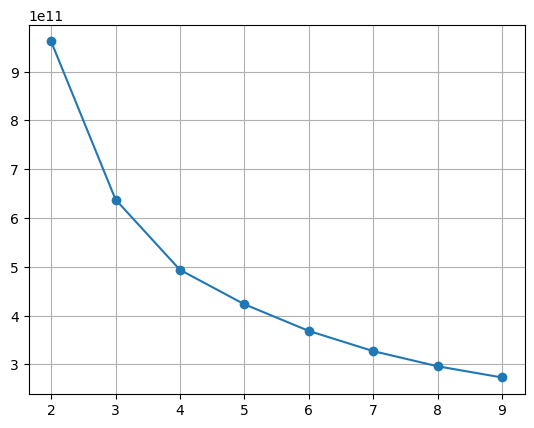

In [254]:
plt.grid()
plt.plot(np.arange(2, 10), score1, marker = "o")
plt.show()

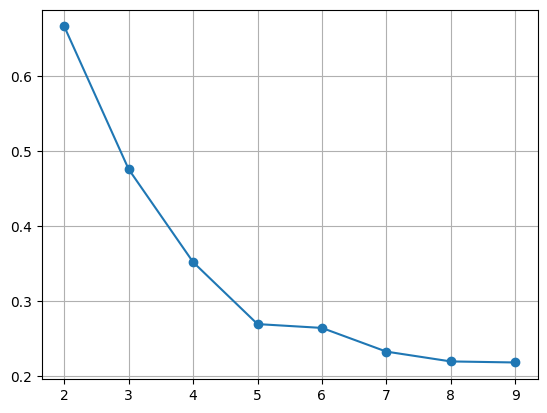

In [255]:
plt.grid()
plt.plot(np.arange(2, 10), score2, marker = "o")
plt.show()

In [256]:
model1 = KMeans(n_clusters=2, random_state=123, init="k-means++")
model1.fit(data)
model1.cluster_centers_

c:\Users\Farukh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[4.34259019e+03, 4.87074754e+03, 9.37769904e-01, 1.17384564e+00,
        3.62086148e-02, 1.83811317e-02, 1.07372938e+02, 9.07075628e+00,
        6.60970446e+03, 8.96463736e+02, 5.40708061e+03, 4.81709822e+03],
       [3.94817431e+03, 5.07172739e+03, 9.59370904e-01, 3.23722149e-01,
        2.22804718e-02, 1.17955439e-02, 1.28736566e+02, 6.45871560e+00,
        3.13199502e+04, 1.72652687e+03, 2.90518716e+04, 5.68343119e+03]])

In [257]:
claster_k = model1.labels_

In [258]:
from sklearn.cluster import AgglomerativeClustering

In [259]:
model2 = AgglomerativeClustering(2, compute_distances=True)
claster_ier = model2.fit(data).labels_
claster_ier

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [260]:
from sklearn.cluster import DBSCAN

In [261]:
model3 = DBSCAN(eps=123, min_samples=23).fit(data)
model3.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [262]:
data["claster_k"] = claster_k
data["claster_ier"] = claster_ier
data["claster_dbscan"] = model3.labels_

In [263]:
import plotly.graph_objects as go

In [267]:
data["claster_k"].value_counts()
fig1 = go.Figure(data=[go.Scatter3d(x=data["author_playtime_forever"], y=data["author_playtime_last_two_weeks"], z=data["author_playtime_at_review"],mode="markers", marker_color=data["claster_k"], marker_size=4)])
fig1.show()

In [268]:
data["claster_ier"].value_counts()
fig2 = go.Figure(data=[go.Scatter3d(x=data["author_playtime_forever"], y=data["author_playtime_last_two_weeks"], z=data["author_playtime_at_review"],mode="markers", marker_color=data["claster_ier"], marker_size=4)])
fig2.show()

In [269]:
data["claster_dbscan"].value_counts()
fig3 = go.Figure(data=[go.Scatter3d(x=data["author_playtime_forever"], y=data["author_playtime_last_two_weeks"], z=data["author_playtime_at_review"],mode="markers", marker_color=data["claster_dbscan"], marker_size=4)])
fig3.show()